## Install Required Packages

In [1]:
!pip install mlxtend==0.21.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


## Import necessary modules

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

## Extract the cifar10 dataset in training and testing sets

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## Output labels

In [4]:
class_names = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## Normalize the training and testing datasets

In [5]:
X_train = X_train/255.0
X_test = X_test / 255.0

## Build CNN Model

In [6]:
model = Sequential([
    Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3)),
    Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=2,padding="valid"),
    Dropout(0.5),
    Flatten(),
    Dense(128,activation="relu"),
    Dense(10,activation="softmax")
])

## Print summary of the model

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                        

## Compile the model

In [8]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['sparse_categorical_accuracy'])

## Training the model

In [9]:
history = model.fit(X_train,y_train,epochs=5,batch_size=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/5
5000/5000 [==============================] - 34s 4ms/step - loss: 1.3941 - sparse_categorical_accuracy: 0.4991 - val_loss: 1.1025 - val_sparse_categorical_accuracy: 0.6091
Epoch 2/5
5000/5000 [==============================] - 20s 4ms/step - loss: 1.0765 - sparse_categorical_accuracy: 0.6202 - val_loss: 1.0364 - val_sparse_categorical_accuracy: 0.6387
Epoch 3/5
5000/5000 [==============================] - 19s 4ms/step - loss: 0.9542 - sparse_categorical_accuracy: 0.6649 - val_loss: 0.9553 - val_sparse_categorical_accuracy: 0.6655
Epoch 4/5
5000/5000 [==============================] - 20s 4ms/step - loss: 0.8675 - sparse_categorical_accuracy: 0.6915 - val_loss: 0.9558 - val_sparse_categorical_accuracy: 0.6639
Epoch 5/5
5000/5000 [==============================] - 20s 4ms/step - loss: 0.7987 - sparse_categorical_accuracy: 0.7184 - val_loss: 0.8948 - val_sparse_categorical_accuracy: 0.6873


## Plotting accuracy and loss of the model

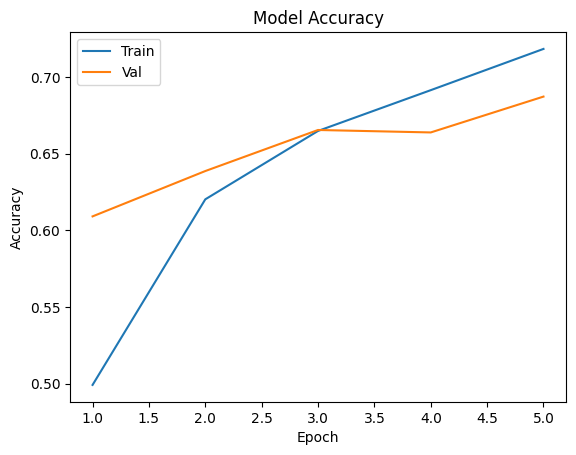

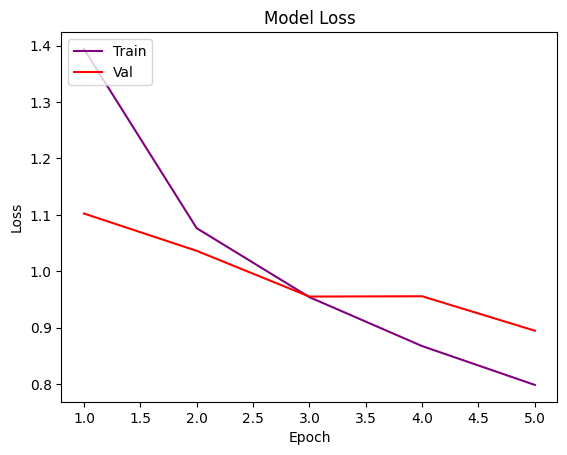

In [10]:
# plot training and validation accuracy values
epoch_range = range(1,6)
plt.plot(epoch_range,history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range,history.history['val_sparse_categorical_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc="upper left")
plt.show()

# plot training and validation loss values
plt.plot(epoch_range,history.history['loss'],color="purple")
plt.plot(epoch_range,history.history['val_loss'],color="red")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc="upper left")
plt.show()

## Make prediction

In [11]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([3, 8, 8, ..., 5, 1, 7])

## Plotting confusion matrix

In [12]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[712,  20,  58,  26,  21,   1,  13,   9, 101,  39],
       [ 21, 804,   9,  15,   4,   2,   9,   2,  47,  87],
       [ 55,   7, 658,  56,  82,  47,  47,  25,  17,   6],
       [ 25,  15, 127, 470,  96, 130,  68,  34,  22,  13],
       [ 19,   3, 138,  61, 630,  25,  58,  51,  14,   1],
       [ 12,   4, 118, 180,  67, 512,  41,  48,  11,   7],
       [  6,   5,  90,  51,  57,  11, 759,   8,  10,   3],
       [ 16,   3,  68,  42,  72,  51,   9, 726,   4,   9],
       [ 43,  43,  18,  18,   9,   3,   2,   5, 834,  25],
       [ 35,  90,  12,  16,   4,   5,   3,  19,  48, 768]])

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

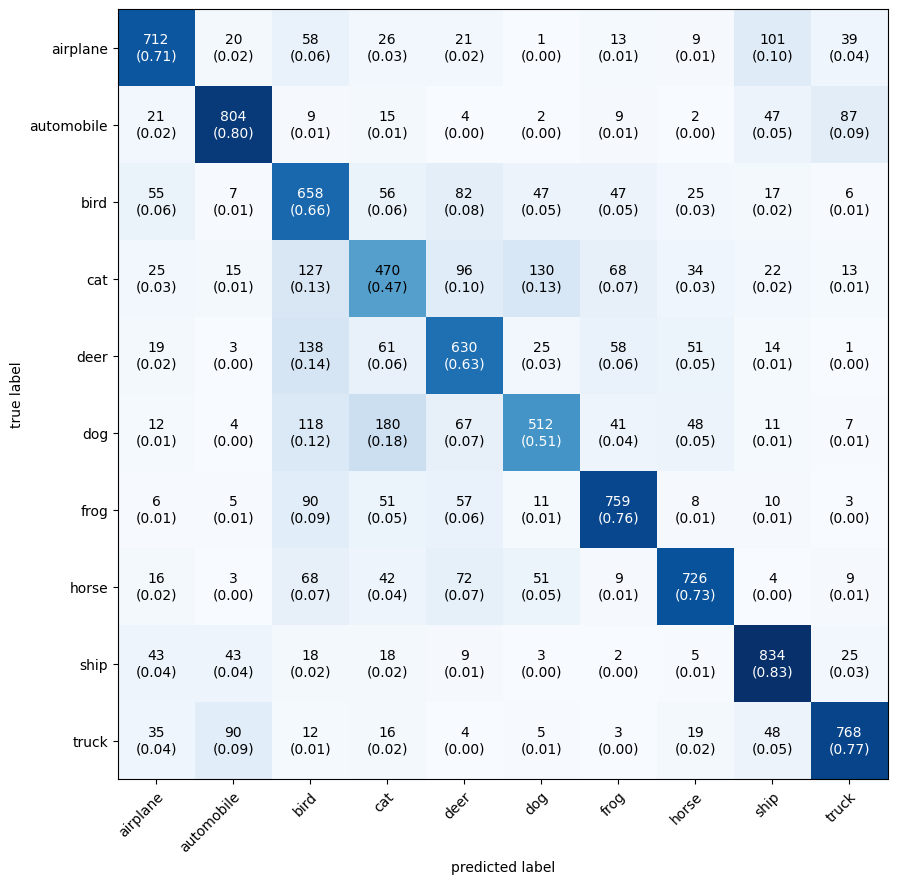

In [13]:
conf_mat = plot_confusion_matrix(mat,figsize=(10,10),class_names=class_names,show_normed=True)
conf_mat